<h3> <strong> 1. Set Environment </strong> </h3>

<h4> <strong> (1) Clone Yolo V5  </strong> </h4>

Yolo V5를 사용하기 위해서는 YoloV5 github를 clone해야 한다. <br>
터미널에 다음을 입력하면 된다.

```
git clone https://github.com/ultralytics/yolov5
```

<h4> <strong> (2) Create Conda Inf </strong> </h4>

Yolo V5 환경에 맞는 conda 가상환경을 생성해야 한다. <br>
이때 Python은 3.8 이상 버전을 가져와야 한다. <br>
그리고 필요한 패키지(모듈)을 설치해야 하는데 clone해온 yolov5의 requirement.txt파일을 이용해 설치하면 된다. <br>
아래 코드를 터미널에 입력하면 된다.

```
# Create Conda Inf
conda create -n yolov5 python=3.8   # conda 환경 생성한다.
conda activate yolov5               # conda 환경 활성화한다.
```

```
# Set Module
cd yolov5                        # yolov5 파일에 접근한다.
pip install -r requirements.txt  # requirements.txt 파일에 저장된 모듈들을 불러온다.
```

<strong> [conda activate Error] </strong>

위에서 conda activate yolov5를 실행시 다음과 같은 에러가 발생할 수 있다.

* CommandNotFoundError: Your shell has not been properly configured to use 'conda activate'.

위 같은 에러 발생시 현재 서버 안에 있는 conda 파일에 접근해야 한다. <br>
필자의 경우에는 아래와 같은 명령을 통해 해결했다.

```
source ./../conda/etc/profile.d/conda.sh
```

이후 activate 명령 사용시 정상적으로 작동한다.


<strong> [requirement.txt File] </strong>

우리가 프로젝트를 개발하고 이를 github에 공개했다고 가정하자. <br>
그렇다면 다른 사용자가 우리 프로젝트를 사용할 때 우리가 사용한 패키지들을 버전에 맞게 설치해야 한다. <br>
이때 pip install 명령을 이용해 일일이 모듈을 설치하면 너무 번거로울 것이다. <br>
그래서 우리의 프로젝트에 맞는 모듈들의 버전을 정리해 놓은 파일이 requirement.txt 파일이다. <br>
해당 파일을 이용하면 한 번에 필요한 모듈들을 설치할 수 있다.


<h3> <strong> 2. Set Data Folder </strong> </h3>

yolov5에는 data 폴더가 존재한다. <br>
이 data 폴더 안에 train, valid 폴더를 만들고 각 폴더에 images, labels 폴더를 만들어야 한다. <br>
파일 구조는 아래와 같다.

```
|yolov5
|   ├─data
|   |   ├─train
|   |   |   ├─images
|   |   |   ├─labels
|   |   ├─valid
|   |   |   ├─images
|   |   |   ├─labels
```

test 폴더도 이후 detect.py를 사용할 때 필요하므로 옮겨 주도록 하자.

아래 코드는 train 이미지를 train과 valid로 나누어 해당 폴더에 저장해주는 코드이다. (약 5분 정도 소요된다.) 
valid는 총 이미지의 20%를 주었다. <br>
만들어진 폴더는 그래도 yolov5의 data 폴더에 복사해주면 된다.

In [ ]:
# 해당 폴더 안에 train, valid 폴더가 없다면 생성한다.
import os

if not os.path.exists('./train'): os.makedirs('./train')
if not os.path.exists('./valid'): os.makedirs('./valid')


In [ ]:
import numpy as np
import os
from sklearn.model_selection import train_test_split
from PIL import Image

imgs = [str(i) for i in range(4883)]                            # 이미지들에 접근하기 위해 형태에 맞게 이미지 번호를 저장한다.
for i in range(len(imgs)):
    while len(imgs[i])<4: imgs[i] = '0'+imgs[i] 

np.random.seed(42)                                              # random seed를 고정한다.
np.random.shuffle(imgs)                                         # 이미지 번호를 섞어준다.

train_imgs, valid_imgs = train_test_split(imgs, test_size=0.2)  # random seed는 위에서 지정했으므로 지정하지 않아도 된다.
train_imgs.sort()                                               # images 저장 과정에서는 필요없지만 이후 labels 저장을 위해 정렬해준다.
valid_imgs.sort()

imgs_path = './../detection/dataset/train'                      # 이미지 파일에 접근하기 위해 train_image가 저장된 path를 지정해 놓는다.

print(f'train imgs 개수: {len(train_imgs)} / valid imgs 개수: {len(valid_imgs)}')

for train_img in train_imgs:
    save_path = './train/images'                                # 이미지를 저장할 폴더를 지정한다.
    if not os.path.exists(save_path): os.makedirs(save_path)    # 해당 폴더가 없으면 생성한다.
    img = Image.open(os.path.join(imgs_path, train_img+'.jpg')) # 이미지를 가져오고 저장한다.
    img.save(os.path.join(save_path, train_img+'.jpg'), 'JPEG') 

print('Complete Download Train Images')
    
for valid_img in valid_imgs:
    save_path = './valid/images'                                # 이미지를 저장할 폴더를 지정한다.
    if not os.path.exists(save_path): os.makedirs(save_path)    # 해당 폴더가 없으면 생성한다.
    img = Image.open(os.path.join(imgs_path, valid_img+'.jpg')) # 이미지를 가져오고 저장한다.
    img.save(os.path.join(save_path, valid_img+'.jpg'), 'JPEG')
    
print('Complete Download Valid Images')
    

train imgs 개수: 3906 / valid imgs 개수: 977
Complete Download Train Images
Complete Download Valid Images


위에서 말했듯 train 폴더에는 images 폴더와 labels 폴더가 저장되어 있어야 한다. <br>
labels 저장을 위해서는 train.json의 annotation key에 저장된 BBox 좌표를 사용해야 한다. <br>
해당 좌표 값은 **Coco Dataset 형식이므로 Yolo Dataset 형식으로 바꿔줘야 한다.** 

labels 폴더에는 각 이미지의 BBox 좌표가 txt 형식으로 저장되어 있어야 한다.<br>
아래 형식으로 여러 개의 BBox가 txt 파일에 저장되어 있다고 생각하면 된다.

> <strong> txt 파일 각 행 구조: (class numbaer) (x) (y) (width) (height) </strong> <br>
Ex) 0 0.34 0.12 0.4 0.

아래는 train, valid 폴더에 labels 데이터를 생성해주는 코드이다.

In [ ]:
import json
import os

with open("../detection/dataset/train.json", "r") as json_file: # label이 저장된 train.json 파일을 가져온다.
    train_json = json.load(json_file)

if not os.path.exists('./train/labels'): os.makedirs('./train/labels')
if not os.path.exists('./valid/labels'): os.makedirs('./valid/labels')

train_idx = 0; valid_idx = 0                                    # 탐색하고 있는 train_img와 valid_img의 인덱스이다. train_imgs, valid_imgs는 이미지 저장 코드에서 정렬된 상태이다.
ann_index = 0; img_index = 0                                    # 탐색할 annotation, image에 대한 인덱스이다. image의 인덱스란 이미지의 번호를 의미한다. (0100의 경우 100이다.)

while img_index < 4883:                                         # BBox가 저장된 모든 annotation을 탐색한다.
    image_id = str(img_index)                                   # 이미지 번호를 형식에 맞게 저장한다. (0은 '0000', 1은 '0001' 식으로 변경)
    while len(image_id)<4: image_id = '0'+image_id
    if image_id == train_imgs[train_idx]:                       # 탐색할 이미지가 train image라면 txt_path를 train 폴더로 지정한다. 
        txt_path='./train/labels'
        if train_idx < len(train_imgs)-1: train_idx += 1        # train_idx를 갱신한다. (단, 모든 이미지가 탐색되지 않으면 위 조건문은 다시 시작되므로 train_idx는 index범위를 넘어가지 않게 설정한다.)
    else:                                                       # 탐색할 이미지가 valid image라면 txt_path를 valid 폴더로 지정한다.
        txt_path='./valid/labels'
        if valid_idx < len(valid_imgs)-1: valid_idx += 1        # valid_idx를 갱신한다. (valid_idx는 사용하지 않아 갱신할 필요는 없지만 train_idx와 동일하게 갱신해준다.)

    txt_file = open(os.path.join(txt_path, image_id+'.txt'), 'w')

    string = ''
    while ann_index < len(train_json['annotations']):
        annotation = train_json['annotations'][ann_index]
        if img_index != annotation['image_id']: 
            break                                               # 현재 탐색하고 있는 이미지와 id가 일치하는지 확인하고 일치하지 않으면 반복문을 탈출한다.
        
        category = annotation['category_id']                    # category_id(class number)를 가져온다.
        coco_x, coco_y, coco_w, coco_h = annotation['bbox']     # bbox를 가져온다. (coco dataset)
        yolo_x = (coco_x+coco_w/2)/1024                         # yolo dataset 형식으로 바꿔준다.
        yolo_y = (coco_y+coco_h/2)/1024
        yolo_w = coco_w/1024
        yolo_h = coco_h/1024
        
        string += f'{category} {yolo_x:.6} {yolo_y:.6} {yolo_w:.6} {yolo_h:.6}\n'
        ann_index += 1
    txt_file.write(string.rstrip())
    txt_file.close()
    img_index += 1

이제 위에서 만들어진 train, valid 폴더를 yolov5의 data 폴더에 옮겨주면 된다.

<h3> <strong> 3. Set Dataset.yaml & model </strong> </h3>

이제 data 폴더 안에 coco128.yaml 파일처럼 우리의 dataset.yaml을 생성해야 한다. <br>
구성은 coco128.yaml과 동일하게 구성하면 된다. <br>

```
train: ./data/train/images
val: ./data/valid/images

nc: 10
names: ['General trash', 'Paper', 'Paper pack', 'Metal', 'Glass', 'Plastic', 'Styrofoam', 'Plastic bag', 'Battery', 'Clothing']
```

이후 사용할 모델을 정해야 하는데 사용할 수 있는 모델은 yolov5 폴더의 models 폴더에 저장되어 있다. <br>
yolov5l, yolov5m, ..., yolov5x가 있는데 각각 더 단순하거나 복잡하다는 차이를 가진다. <br> 
일단 중간 모델인 yolov5m을 사용해보기로 했다. 

**해당 모델을 사용하기 위해서는 해당 yaml파일에 들어가 nc만 수정해주면 된다.**

<h3> <strong> 4. Weights & Biases Logging </strong> </h3>

Wandb를 사용하려면 pip install 명령을 사용해 wandb를 다운 받아야 한다.

```
pip install wandb
```

이후 train.py를 수행시키면 wandb관련 option이 나온다.

<h3> <strong> 5. Training </strong> </h3>

학습시 아래 명령을 터미널에 입력하면 된다. (epoch는 원하는 만큼 지정해주면 된다.)

```
python train.py --img 1024 --batch 16 --epochs 200 --data './data/dataset.yaml' --cfg './models/yolov5m.yaml' --weights yolov5m.pt --name YoloV5m_200epoch
```

> 
--img: input image의 size <br>
--batch: batch size <br>
--epochs: epoch 횟수 <br>
--data: 사용할 dataset.yaml 파일 경로 (default: data/coco128.yaml)<br>
--cfg: 사용할 model.yaml 파일 경로 (default: None)<br>
--weights: 전이 학습 사용시 사용할 weight (default: yolov5s.pt)<br>
--name: 학습시 runs 폴더 안에 생성되는 폴더 이름 (default: exp)<br>
--hyp: hyperparameter 관련 .yaml파일 경로 (default: hyp.scratch-low.yaml)
추가로 많은 옵션이 존재하는데 train.py 안에 설명되어 있으니 참고하면 된다.

<strong> [ImportError: libGL.so.1: cannot open shared object file: No such file or directory] <strong>

train.py에서 cv2 모듈 import시 위와 같은 에러가 발생할 수 있다. <br>
이때는 터미널에서 아래와 같은 명령을 입력해주자.

```
apt-get install libgl1-mesa-glx
```



<strong> [multi-scale(Option) VS scale(Hyperparameter)] </strong>

> **scale: scales an image contents while keeping the --img-size constant.** <br>
> - 이미지 사이즈는 그대로 두고 이미지의 내용물의 크기를 조정한다.
>
> **--multi-scale: scales the actual --img-size.**
> - 이미지 사이즈를 바꾼다.

<h3> <strong> 6. Test </strong> </h3>

아래 명령을 사용해 test 이미지에 대한 bbox를 생성할 수 있고 해당 좌표값과 예측값을 기록할 수 있다.

```
python detect.py --img 1024 --source './data/test' --weights './runs/train/YoloV5m_200epoch/weights/best.pt' --iou-thres 0.4 --save-txt --save-conf
```

옵션에 대한 설명은 detect.py 파일을 참고하면 된다.

<h3> <strong> 7. Make Submission.csv </strong> </h3>

이후 생성된 label들을 사용해 submission.csv 파일을 만들어야 한다. <br>
코드는 다음과 같다.

In [ ]:
import pandas as pd
import os

df = pd.DataFrame(index=[i for i in range(4871)], columns=['PredictionString', 'image_id'])

yolo_path = './../yolov5/runs/detect/YoloV5m_200epoch/labels'
for img_index in range(4871):
    image_id = str(img_index)
    while len(image_id)<4: image_id = '0'+image_id

    PredictionString = ''
    try: 
        txt_file = open(os.path.join(yolo_path, image_id+'.txt'), 'r')                          # 해당 이미지의 label이 들어있는 .txt 파일에 접근한다.
        lines = txt_file.readlines()                                                            # 해당 파일의 모든 line을 읽어온다.
    
        for line in lines:
            category, yolo_x, yolo_y, yolo_w, yolo_h, pred = (line.split())                     # 해당 line에 저장된 category, coordinate, prediction score를 가져온다.
            coco_x = (float(yolo_x)-float(yolo_w)/2)*1024                                       # yolo data type을 coco data type으로 변환한다.
            coco_y = (float(yolo_y)-float(yolo_h)/2)*1024
            coco_w = float(yolo_w)*1024
            coco_h = float(yolo_h)*1024
            PredictionString += (f'{category} {pred} {coco_x} {coco_y} {coco_w} {coco_h} ') 
        txt_file.close()
    except FileNotFoundError:
        pass
    
    df.iloc[img_index] = [PredictionString, 'test/'+image_id+'.jpg']                            # PredictionString과 image_id를 저장한다.
df.to_csv('./submission.csv')

<h3> <strong> 8. Result </strong> </h3>

epoch 200의 결과 mAP가 0.0014가 나왔다. <br>
wandb에서 제공하는 train, valid image에 대한 loss 그래프는 다음과 같다.

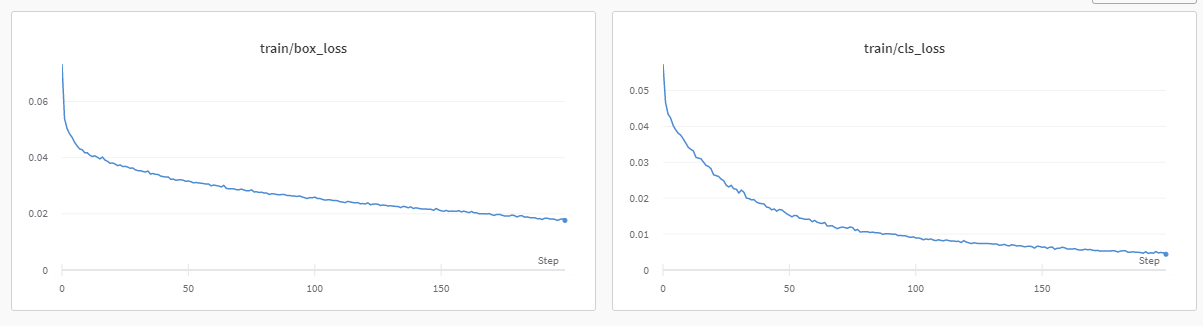

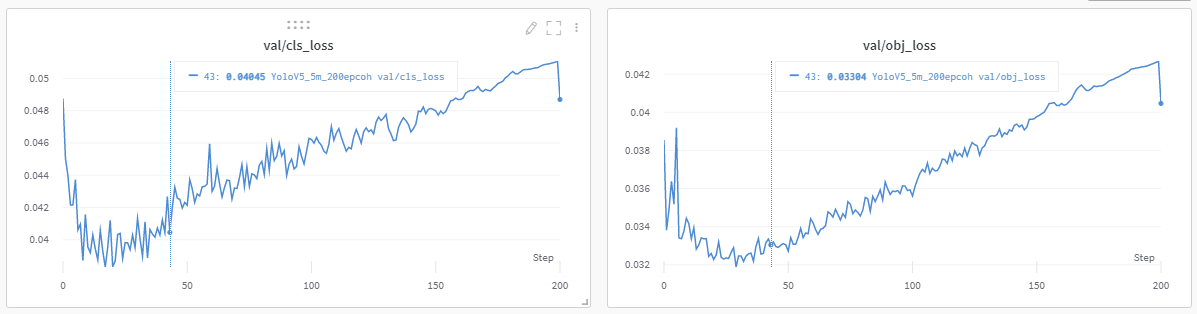

train loss의 경우 계속 감소하면서 수렴하지만 valid loss의 경우 감소하다가 증가하는 추세를 보인다. <br>
valid image의 mAP는 아래처럼 epoch 100회부터는 거의 변화가 없다.

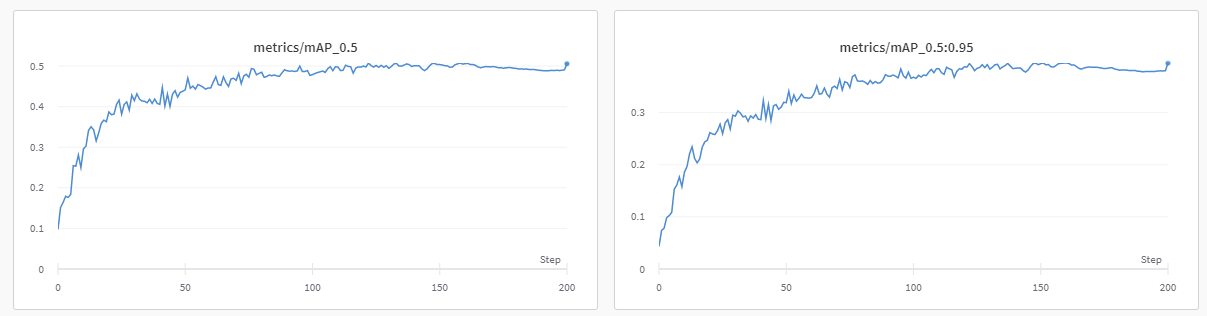